In [1]:
import base64
import pandas as pd
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import arch

In [2]:
spx = pd.read_pickle("spx.pickle")

In [39]:
def forecast(quotes, horizon=10):
    """
    GARCH forecast
    """
    returns = 100*quotes['close'].pct_change().dropna()

    am = arch.arch_model(
        returns,
        vol="Garch",
        p=1,
        q=1,
        dist="Normal")

    am_fitted = am.fit(
        disp='off',
        update_freq=0,
        show_warning=False)

    annualized_volatility = am_fitted.conditional_volatility * (252 ** 0.5)
    fitted_df = pd.DataFrame(index=quotes.index)
    fitted_df['iv'] = annualized_volatility

    # Forecast section
    am_forecast = am_fitted.forecast(horizon=horizon)
    predicted_volatility = (am_forecast.variance*252) ** 0.5

    end_date = quotes.index[-1]
    working_dates = pd.bdate_range(
        end_date + pd.Timedelta(days=1), periods=horizon)

    forecast_df = pd.DataFrame(index=working_dates)
    forecast_df['fcst'] = predicted_volatility.values[0]

    return fitted_df, forecast_df

In [40]:
fitted_df, forecast_df = forecast(spx)

In [60]:
def forecast(quotes, horizon=22):
    """
    GARCH forecast
    """
    returns = 100*quotes['close'].pct_change().dropna()

    am = arch.arch_model(
        returns,
        vol="Garch",
        p=1,
        q=1,
        dist="Normal")

    am_fitted = am.fit(
        disp='off',
        update_freq=0,
        show_warning=False)

    annualized_volatility = am_fitted.conditional_volatility * (252 ** 0.5)
    volatility = pd.DataFrame(index=quotes.index)
    volatility['GARCH (1,1)'] = annualized_volatility

    # Forecast section
    am_forecast = am_fitted.forecast(horizon=horizon)
    predicted_volatility = (am_forecast.variance*252) ** 0.5

    end_date = quotes.index[-1]
    working_dates = pd.bdate_range(
        end_date + pd.Timedelta(days=1), periods=horizon)

    fcst = pd.DataFrame(index=working_dates)
    fcst['GARCH (1,1)'] = predicted_volatility.values[0]
    volatility = pd.concat([volatility, fcst])

    return volatility

In [61]:
vol = forecast(spx)

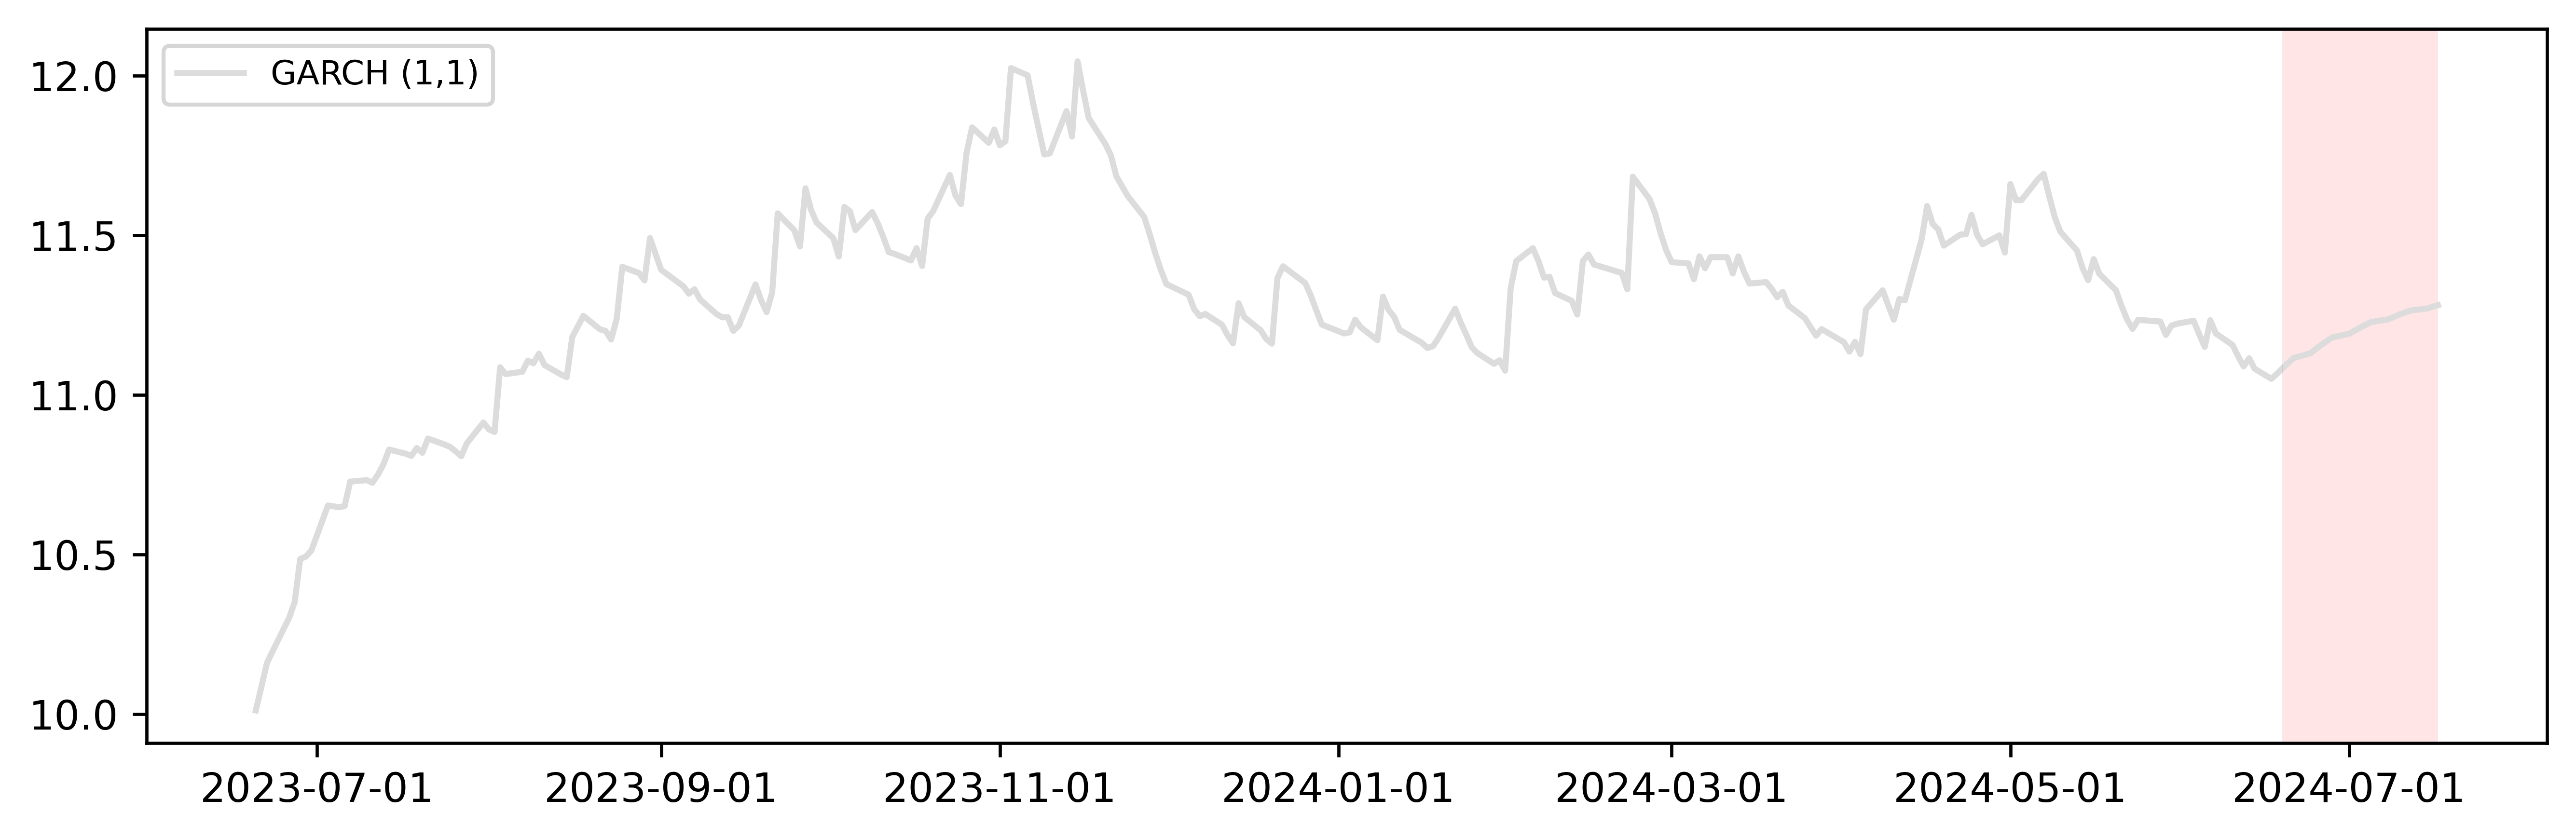

In [98]:
    _, ax1 = plt.subplots(
        figsize=(9, 3),
        dpi=600)

    sns.lineplot(
        vol,
        palette="coolwarm",
        dashes=False,
        ax=ax1)

    # Formatting
    ax1.set_ylabel("")
    ax1.set_xlabel("")
    ax1.legend(fontsize='small', loc='upper left')
    ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    # Add horizontal line for today
    today = pd.Timestamp.today().date()
    ax1.axvline(today, color='black', linestyle='-', linewidth=0.1)
    ax1.axvspan(today, vol.index[-1], facecolor='red', alpha=0.1)
    
    plt.tight_layout()

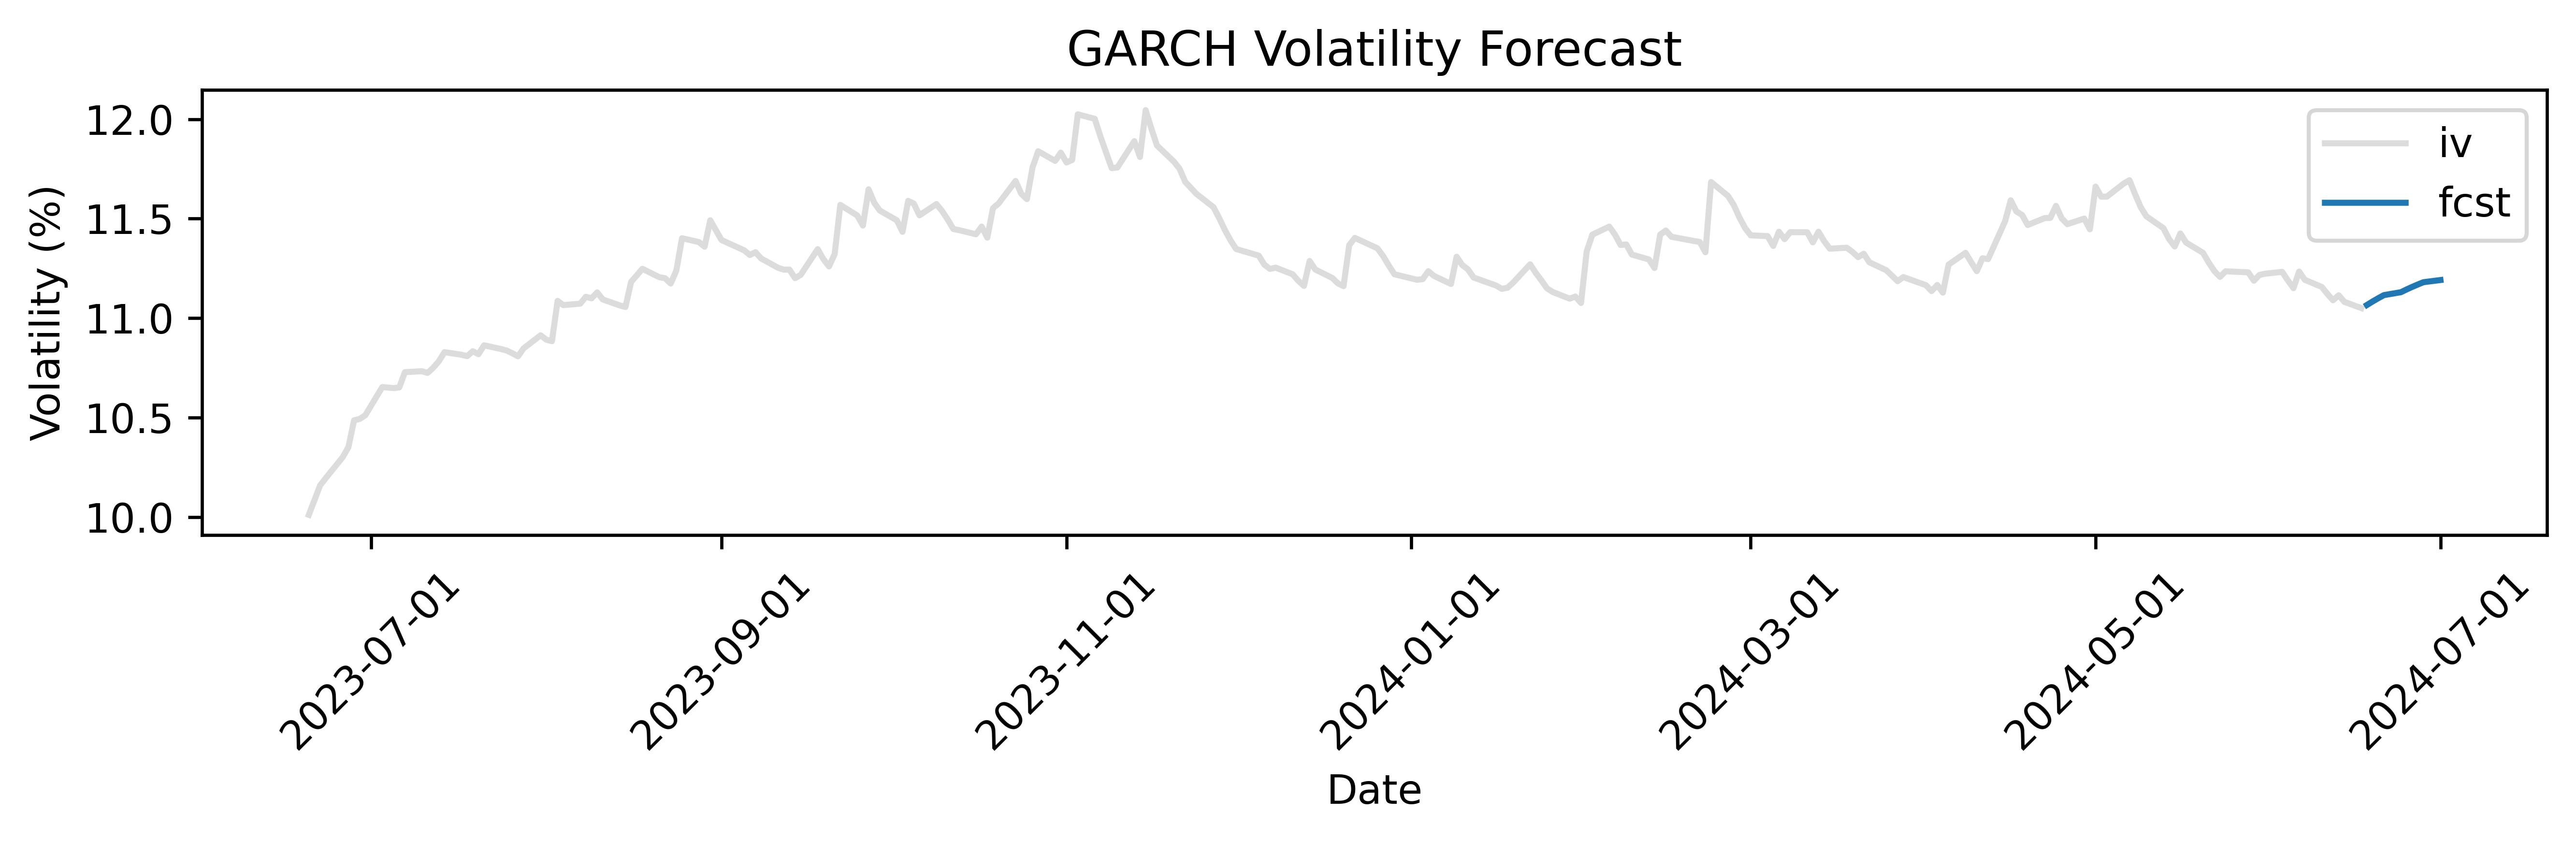

In [97]:
_, ax1 = plt.subplots(
    figsize=(9, 3),
    dpi=600)

sns.lineplot(
    fitted_df,
    palette="coolwarm",
    dashes=False,
    ax=ax1)

sns.lineplot(
    forecast_df,
    color=sns.color_palette("coolwarm")[0],
    dashes=False,
    ax=ax1)

ax1.set_title('GARCH Volatility Forecast')
ax1.set_ylabel('Volatility (%)')
ax1.set_xlabel('Date')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_tick_params(rotation=45)

ax1.legend()
plt.tight_layout()

In [100]:
sns.color_palette("coolwarm")[1]

(0.603162067917647, 0.7315274773529412, 0.9995652785372549)

In [94]:
def get_models(quotes):
    """
    Construct GARCH models
    """
    returns = 100*quotes['close'].pct_change().dropna()

    models = [
        [arch.arch_model(returns, vol='ARCH', p=1), 'ARCH(1)'],
        [arch.arch_model(returns, vol='GARCH', p=1, q=1), 'GARCH(1,1)'],
        [arch.arch_model(returns, vol='GARCH', p=1, q=1, dist='studentst'), 'GARCH(1,1) Student-t'],
        # [arch.arch_model(returns, vol='GARCH', p=1, o=1, q=1), 'TGARCH'],
    ]

    return models

In [75]:
models = get_models(spx)
quotes = spx

In [77]:
    results = pd.DataFrame(index=quotes.index)
    
    end_date = quotes.index[-1]
    working_dates = pd.bdate_range(
        end_date + pd.Timedelta(days=1), periods=22)
    
    results = pd.DataFrame(index=quotes.index.append(working_dates))

In [78]:
results

""
2023-06-16
2023-06-20
2023-06-21
2023-06-22
2023-06-23
...
2024-07-11
2024-07-12
2024-07-15
2024-07-16


In [95]:
def forecast(models, quotes, horizon=22):
    """
    GARCH forecast
    """
    end_date = quotes.index[-1]
    working_dates = pd.bdate_range(
        end_date + pd.Timedelta(days=1), periods=horizon)
    results = pd.DataFrame(index=quotes.index.append(working_dates))

    models = get_models(quotes)
    
    for model, label in models:
        fitted = model.fit(
            disp='off',
            update_freq=0,
            show_warning=False)

        annualized_volatility = fitted.conditional_volatility * (252 ** 0.5)
        results.loc[quotes.index, label] = annualized_volatility

        # Forecast section
        am_forecast = fitted.forecast(horizon=horizon)
        predicted_volatility = (am_forecast.variance*252) ** 0.5

        results.loc[working_dates, label] = predicted_volatility.values[0]

    return results

<Axes: >

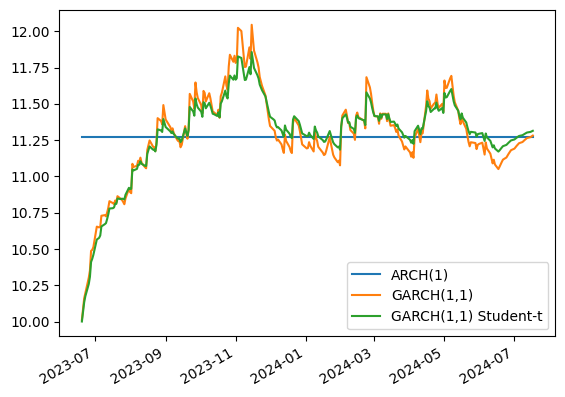

In [96]:
vols = forecast(models, spx)
vols.plot()